## 📚 Imports

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

## 🔎 Google Stock

In [3]:
df_g = pd.read_csv('AAPL_data.csv')

In [4]:
df_g.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
df_g.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1259.0,1.090554e+02,3.054922e+01,5.542420e+01,8.464780e+01,108.97,1.273350e+02,1.793700e+02
high,1259.0,1.099511e+02,3.068619e+01,5.708570e+01,8.533495e+01,110.03,1.281000e+02,1.801000e+02
low,1259.0,1.081416e+02,3.037622e+01,5.501420e+01,8.425065e+01,108.05,1.262900e+02,1.782500e+02
close,1259.0,1.090667e+02,3.055681e+01,5.578990e+01,8.483065e+01,109.01,1.271200e+02,1.792600e+02
volume,1259.0,5.404790e+07,3.346835e+07,1.147592e+07,2.969438e+07,45668931.00,6.870872e+07,2.668336e+08


In [6]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [7]:
df_g['date'] = pd.to_datetime(df_g['date'])
df_g.drop('Name', axis = 1, inplace= True)

### Checking outliers

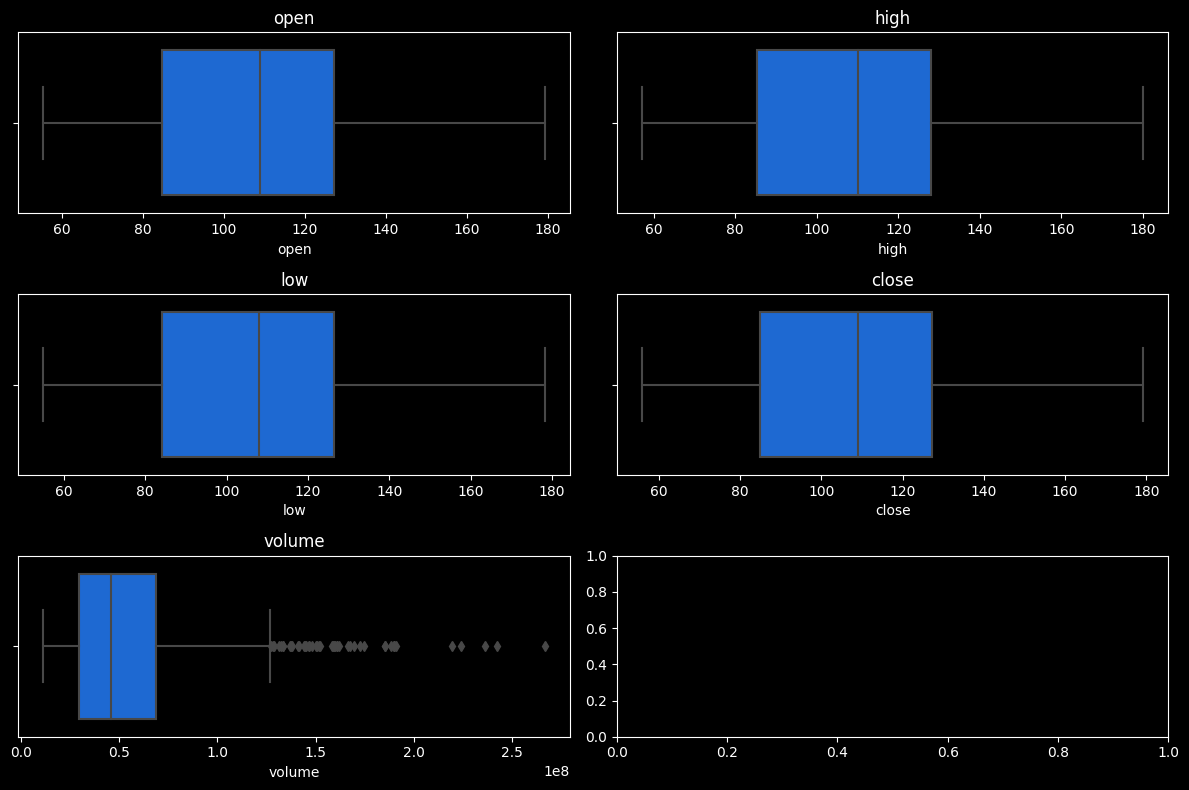

In [8]:
# Set the background color
plt.style.use('dark_background')

# Selected only the numerial columns
num_df = df_g.select_dtypes(include = ['float64','int64']).columns

# Sets the number of rows and columns of the subplot grid
num_rows = (len(num_df) + 1) // 2
num_cols = 2

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize = (12, 8))
axs = axs.flatten()

# Creates a boxplot on each subplot
for i, col in enumerate(num_df):
    sn.boxplot(x = df_g[col], ax = axs[i], color = '#0064f0')
    axs[i].set_title(col)
    
# Adjust spacings between subplots and display the graph
plt.tight_layout()
plt.show()

## 📈 Exploratory Data Analysis (Google)

### Open values during the years

In [ ]:
# Create figure and set layout
fig = go.Figure(
    layout = go.Layout(
        title = 'Open Values During The Years',
        xaxis = dict(title = 'Date'),
        yaxis = dict(title = 'Value'),
        showlegend = False,
        paper_bgcolor = 'black',
        plot_bgcolor = 'black',
        width = 950,
        height = 600
    )
)

# Add line traces
fig.add_trace(go.Scatter(x = df_g['date'], y = df_g['open'], mode = 'lines', name = 'Open', line = dict(color = '#01E3F1')))
